In [2]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
df_outpatient = pd.read_csv("Train_Outpatientdata-1542865627584.csv")
df_train_flagged = pd.read_csv("Train-1542865627584.csv")

In [3]:
df_outpatient.isnull().sum()*100/len(df_outpatient)

BeneID                      0.000000
ClaimID                     0.000000
ClaimStartDt                0.000000
ClaimEndDt                  0.000000
Provider                    0.000000
InscClaimAmtReimbursed      0.000000
AttendingPhysician          0.269635
OperatingPhysician         82.497484
OtherPhysician             62.327205
ClmDiagnosisCode_1          2.018979
ClmDiagnosisCode_2         37.737307
ClmDiagnosisCode_3         60.741264
ClmDiagnosisCode_4         75.741351
ClmDiagnosisCode_5         85.640586
ClmDiagnosisCode_6         90.582864
ClmDiagnosisCode_7         93.633640
ClmDiagnosisCode_8         95.574587
ClmDiagnosisCode_9         97.134066
ClmDiagnosisCode_10        99.790820
ClmProcedureCode_1         99.968710
ClmProcedureCode_2         99.993047
ClmProcedureCode_3         99.999227
ClmProcedureCode_4         99.999614
ClmProcedureCode_5        100.000000
ClmProcedureCode_6        100.000000
DeductibleAmtPaid           0.000000
ClmAdmitDiagnosisCode      79.637345
d

almost all th ClmProcedureCode are empty so removing all these columns

In [3]:
df_outpatient = df_outpatient.drop([ 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],axis=1)

# Cleaning & Structuring out_patient data

In [4]:
df_outpatient.shape

(517737, 19)

In [5]:
df_outpatient["ClaimID"].nunique()

517737

In [6]:
df_outpatient

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BENE11003,CLM189947,2009-02-12,2009-02-12,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BENE11003,CLM438021,2009-06-27,2009-06-27,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,2009-08-06,2009-08-06,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517733,BENE159198,CLM551294,2009-08-29,2009-08-29,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517734,BENE159198,CLM596444,2009-09-24,2009-09-24,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
517735,BENE159198,CLM636992,2009-10-18,2009-10-18,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
##converting date columns in datetime formate
df_outpatient.ClaimStartDt = pd.to_datetime(df_outpatient.ClaimStartDt)
df_outpatient.ClaimEndDt = pd.to_datetime(df_outpatient.ClaimEndDt)
df_outpatient.dtypes

BeneID                            object
ClaimID                           object
ClaimStartDt              datetime64[ns]
ClaimEndDt                datetime64[ns]
Provider                          object
InscClaimAmtReimbursed             int64
AttendingPhysician                object
OperatingPhysician                object
OtherPhysician                    object
ClmDiagnosisCode_1                object
ClmDiagnosisCode_2                object
ClmDiagnosisCode_3                object
ClmDiagnosisCode_4                object
ClmDiagnosisCode_5                object
ClmDiagnosisCode_6                object
ClmDiagnosisCode_7                object
ClmDiagnosisCode_8                object
ClmDiagnosisCode_9                object
ClmDiagnosisCode_10               object
dtype: object

In [8]:
##creating claim_duration and hospitalisation_duration columns in intiger and then dropping claim columns
df_outpatient["claim_duration"] = df_outpatient.ClaimEndDt - df_outpatient.ClaimStartDt
df_outpatient["claim_duration"] = df_outpatient["claim_duration"].dt.days
df_outpatient = df_outpatient.drop(["ClaimStartDt", "ClaimEndDt"], axis=1)
df_outpatient

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,claim_duration
0,BENE11002,CLM624349,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,BENE11003,CLM189947,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,BENE11003,CLM438021,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,BENE11004,CLM121801,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,BENE11004,CLM150998,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
517733,BENE159198,CLM551294,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
517734,BENE159198,CLM596444,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
517735,BENE159198,CLM636992,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
##creating AttendingPhysician_binary, OperatingPhysician_binary, OtherPhysician_binary and physician_count
df_outpatient['AttendingPhysician_binary'] = df_outpatient['AttendingPhysician'].notnull().astype(int)
df_outpatient['OperatingPhysician_binary'] = df_outpatient['OperatingPhysician'].notnull().astype(int)
df_outpatient['OtherPhysician_binary'] = df_outpatient['OtherPhysician'].notnull().astype(int)
df_outpatient["physician_count"] = df_outpatient['AttendingPhysician_binary']+df_outpatient['OperatingPhysician_binary']+df_outpatient['OtherPhysician_binary']
df_outpatient

,BeneID,ClaimID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count
0,BENE11002,CLM624349,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1
1,BENE11003,CLM189947,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1
2,BENE11003,CLM438021,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1
3,BENE11004,CLM121801,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1
4,BENE11004,CLM150998,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,BENE159198,CLM510792,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,3
517733,BENE159198,CLM551294,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,2
517734,BENE159198,CLM596444,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1
517735,BENE159198,CLM636992,PRV53689,70,PHY403198,NaN,PHY419379,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1,2


In [10]:
df_outpatient = df_outpatient.set_index("ClaimID")

In [11]:
##creating ClmDiagnosisCode, ClmProcedureCode and Physician dataframe and puting ClaimID on index
#ClmDiagnosisCode = df_outpatient[['ClaimID','ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
#       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
#       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
#       'ClmDiagnosisCode_10']]
#ClmProcedureCode = df_outpatient[['ClaimID','ClmProcedureCode_1', 'ClmProcedureCode_2',
#       'ClmProcedureCode_3', 'ClmProcedureCode_4', 'ClmProcedureCode_5',
#       'ClmProcedureCode_6']]
Physician = df_outpatient[["AttendingPhysician","OperatingPhysician","OtherPhysician"]]

#ClmDiagnosisCode = ClmDiagnosisCode.set_index("ClaimID")
#ClmProcedureCode = ClmProcedureCode.set_index("ClaimID")
#Physician = Physician.set_index("ClaimID")


In [12]:
Physician

,AttendingPhysician,OperatingPhysician,OtherPhysician
ClaimID,,,
CLM624349,PHY326117,NaN,NaN
CLM189947,PHY362868,NaN,NaN
CLM438021,PHY328821,NaN,NaN
CLM121801,PHY334319,NaN,NaN
CLM150998,PHY403831,NaN,NaN
...,...,...,...
CLM510792,PHY364188,PHY364188,PHY385752
CLM551294,PHY423019,PHY332284,NaN
CLM596444,PHY361063,NaN,NaN


In [ ]:
##checking length of all unique ClmProcedureCodes
l1= list(ClmDiagnosisCode['ClmDiagnosisCode_1'].unique())
l2= list(ClmDiagnosisCode['ClmDiagnosisCode_2'].unique())
l3= list(ClmDiagnosisCode['ClmDiagnosisCode_3'].unique())
l4= list(ClmDiagnosisCode['ClmDiagnosisCode_4'].unique())
l5= list(ClmDiagnosisCode['ClmDiagnosisCode_5'].unique())
l6= list(ClmDiagnosisCode['ClmDiagnosisCode_6'].unique())
l7= list(ClmDiagnosisCode['ClmDiagnosisCode_7'].unique())
l8= list(ClmDiagnosisCode['ClmDiagnosisCode_8'].unique())
l9= list(ClmDiagnosisCode['ClmDiagnosisCode_9'].unique())
l10= list(ClmDiagnosisCode['ClmDiagnosisCode_10'].unique())
l = l1+l2+l3+l4+l5+l6+l7+l8+l9+l10
l_unique = list(set(l))
#print(len(l))
print(len(l_unique))

In [ ]:
##checking length of all unique physician
l1= list(Physician['AttendingPhysician'].unique())
l2= list(Physician['OperatingPhysician'].unique())
l3= list(Physician['OtherPhysician'].unique())
l = l1+l2+l3
l_unique = list(set(l))
#print(len(l))
print(len(l_unique))

## Dealing with  ClmDiagnosisCodes (one-hot encoding)

In [ ]:
#one hot encoding of all ClmDiagnosisCode columns and creating a list of those dataframes
ClmDiagnosisCode_ClmDiagnosisCode_1 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_1'])
ClmDiagnosisCode_ClmDiagnosisCode_2 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_2'])
ClmDiagnosisCode_ClmDiagnosisCode_3 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_3'])
ClmDiagnosisCode_ClmDiagnosisCode_4 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_4'])
ClmDiagnosisCode_ClmDiagnosisCode_5 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_5'])
ClmDiagnosisCode_ClmDiagnosisCode_6 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_6'])
ClmDiagnosisCode_ClmDiagnosisCode_7 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_7'])
ClmDiagnosisCode_ClmDiagnosisCode_8 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_8'])
ClmDiagnosisCode_ClmDiagnosisCode_9 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_9'])
ClmDiagnosisCode_ClmDiagnosisCode_10 = pd.get_dummies(ClmDiagnosisCode['ClmDiagnosisCode_10'])

file_list = [ClmDiagnosisCode_ClmDiagnosisCode_1,ClmDiagnosisCode_ClmDiagnosisCode_2,ClmDiagnosisCode_ClmDiagnosisCode_3,ClmDiagnosisCode_ClmDiagnosisCode_4,ClmDiagnosisCode_ClmDiagnosisCode_5,ClmDiagnosisCode_ClmDiagnosisCode_6,ClmDiagnosisCode_ClmDiagnosisCode_7,ClmDiagnosisCode_ClmDiagnosisCode_8,ClmDiagnosisCode_ClmDiagnosisCode_9,ClmDiagnosisCode_ClmDiagnosisCode_10]

In [ ]:
##one hot encoding of all ClmDiagnosisCodes
ClmDiagnosisCode_onehot_full = pd.DataFrame()
for file in file_list:
    column_list = file.columns.values.tolist()
    ClmDiagnosisCode_onehot_full_columns = ClmDiagnosisCode_onehot_full.columns.values.tolist()
    for column in column_list:
        if column in ClmDiagnosisCode_onehot_full_columns:
            ClmDiagnosisCode_onehot_full[column] = ClmDiagnosisCode_onehot_full[column]+file[column]
        else:
            ClmDiagnosisCode_onehot_full[column] = file[column]

In [ ]:
ClmDiagnosisCode_onehot_full.to_csv("ClmDiagnosisCode_onehot_full.csv")

In [12]:
ClmDiagnosisCode_onehot_top25 = pd.read_csv("ClmDiagnosisCode_onehot_top25.csv")
ClmDiagnosisCode_onehot_top25 = ClmDiagnosisCode_onehot_top25.set_index("ClaimID")

In [13]:
ClmDiagnosisCode_onehot_top25

,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM189947,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM438021,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM121801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM150998,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM551294,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CLM596444,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
outpatient_onehot = pd.merge(df_outpatient, ClmDiagnosisCode_onehot_top25, left_index=True, right_index=True)
outpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,BENE11002,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM189947,BENE11003,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM438021,BENE11003,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM121801,BENE11004,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM150998,BENE11004,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
CLM551294,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
CLM596444,BENE159198,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [21]:
outpatient_onehot['ClmDiagnosisCode_1_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_1'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_2_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_2'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_3_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_3'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_4_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_4'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_5_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_5'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_6_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_6'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_7_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_7'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_8_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_8'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_9_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_9'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_10_binary'] = pd.DataFrame(outpatient_onehot['ClmDiagnosisCode_10'].notnull().astype(int))
outpatient_onehot['ClmDiagnosisCode_sum'] = outpatient_onehot['ClmDiagnosisCode_1_binary']+outpatient_onehot['ClmDiagnosisCode_2_binary']+outpatient_onehot['ClmDiagnosisCode_3_binary']+outpatient_onehot['ClmDiagnosisCode_4_binary']+outpatient_onehot['ClmDiagnosisCode_5_binary']+outpatient_onehot['ClmDiagnosisCode_6_binary']+outpatient_onehot['ClmDiagnosisCode_7_binary']+outpatient_onehot['ClmDiagnosisCode_8_binary']+outpatient_onehot['ClmDiagnosisCode_9_binary']+outpatient_onehot['ClmDiagnosisCode_10_binary']
outpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,sum_ClmDiagnosisCode,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,BENE11002,PRV56011,30,PHY326117,NaN,NaN,78943,V5866,V1272,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM189947,BENE11003,PRV57610,80,PHY362868,NaN,NaN,6115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM438021,BENE11003,PRV57595,10,PHY328821,NaN,NaN,2723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM121801,BENE11004,PRV56011,40,PHY334319,NaN,NaN,71988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM150998,BENE11004,PRV56011,200,PHY403831,NaN,NaN,82382,30000,72887,4280,7197,V4577,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1,1,1,1,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,2163,V4575,53190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM551294,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,07041,5781,25000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM596444,BENE159198,PRV53676,60,PHY361063,NaN,NaN,V570,78079,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0,2


In [22]:
outpatient_onehot = outpatient_onehot.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10'],axis=1)

In [23]:
outpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,sum_ClmDiagnosisCode,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,BENE11002,PRV56011,30,PHY326117,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM189947,BENE11003,PRV57610,80,PHY362868,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM438021,BENE11003,PRV57595,10,PHY328821,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM121801,BENE11004,PRV56011,40,PHY334319,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
CLM150998,BENE11004,PRV56011,200,PHY403831,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1,1,1,1,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM551294,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
CLM596444,BENE159198,PRV53676,60,PHY361063,NaN,NaN,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0,2


In [ ]:
#column wise sum of encoded ClmDiagnosisCodes, sorting, ploting a graph of top 25
ClmDiagnosisCode_onehot_full_axis_sum = pd.DataFrame(ClmDiagnosisCode_onehot_full.sum(axis=0).sort_values(ascending=False))
ClmDiagnosisCode_onehot_full_axis_sum.head(25).plot.bar()

In [ ]:
#labeling data fidning potential fraud claims then removing the flags
df_outpatient_flaged_full = df_outpatient.merge(df_train_flagged, on="Provider", how="left")
df_outpatient_flaged_full = df_outpatient_flaged_full.set_index("ClaimID")
ClmDiagnosisCode_onehot_flagged = pd.merge(df_outpatient_flaged_full["PotentialFraud"], ClmDiagnosisCode_onehot_full, left_index=True, right_index=True)
ClmDiagnosisCode_onehot_flagged_yes = pd.merge(df_outpatient_flaged_full[df_outpatient_flaged_full["PotentialFraud"]=="Yes"]["PotentialFraud"], ClmDiagnosisCode_onehot_full, left_index=True, right_index=True)
ClmDiagnosisCode_onehot_flagged_yes = ClmDiagnosisCode_onehot_flagged_yes.iloc[:,1:]

In [ ]:
##column wise sum of flagged encoded ClmDiagnosisCodes and sorting
ClmDiagnosisCode_onehot_yes_axis_sum = pd.DataFrame(ClmDiagnosisCode_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [ ]:
#creating list of unique top ClmDiagnosisCodes present in both flagged and unflagged data
list_of_top25_ClmDiagnosisCode = ClmDiagnosisCode_onehot_full_axis_sum.index.values.tolist()[:25]
list_of_top25_ClmDiagnosisCode_yes = ClmDiagnosisCode_onehot_yes_axis_sum.index.values.tolist()[:25]
list_of_both_top25_ClmDiagnosisCode = list_of_top25_ClmDiagnosisCode+list_of_top25_ClmDiagnosisCode_yes
list_of_both_top25_ClmDiagnosisCode = list(set(list_of_both_top25_ClmDiagnosisCode))

In [ ]:
ClmDiagnosisCode_onehot =  ClmDiagnosisCode_onehot_flagged[list_of_both_top25_ClmDiagnosisCode]


In [ ]:
#ClmDiagnosisCode_onehot.to_csv("ClmDiagnosisCode_onehot_top25.csv")

In [ ]:
ClmDiagnosisCode_onehot

In [ ]:
#sum_of_other_ClmDiagnosis = ClmDiagnosisCode_onehot_flagged.drop(list_of_both_top25_ClmDiagnosisCode, axis = 1).sum(axis=1)

In [ ]:
#finally creating encoded data with a other sum columns and add a prefix to column names
#ClmDiagnosisCode_onehot = ClmDiagnosisCode_onehot_flagged[list_of_both_top25_ClmDiagnosisCode]
sum_of_other_ClmDiagnosis = ClmDiagnosisCode_onehot_flagged.drop(list_of_both_top25_ClmDiagnosisCode, axis = 1).sum(axis=1)
ClmDiagnosisCode_onehot['sum_diagnosis'] = sum_of_other_ClmDiagnosis
ClmDiagnosisCode_onehot = ClmDiagnosisCode_onehot.add_prefix("Diagnosis_")
ClmDiagnosisCode_onehot

In [ ]:
#dropping old ClmDiagnosisCode columns and merging new encoded ClmDiagnosisCode data with df_inpatient data
df_outpatient_codes_dropped = df_outpatient.drop(['ClmDiagnosisCode_1', 'ClmDiagnosisCode_2', 'ClmDiagnosisCode_3',
       'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5', 'ClmDiagnosisCode_6',
       'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8', 'ClmDiagnosisCode_9',
       'ClmDiagnosisCode_10'],axis=1)
df_outpatient_codes_dropped = df_outpatient_codes_dropped.set_index("ClaimID")
outpatient_onehot = pd.merge(df_outpatient_codes_dropped, ClmDiagnosisCode_onehot, left_index=True, right_index=True)
outpatient_onehot

In [29]:
outpatient_onehot.to_csv("outpatient_onehot.csv",index=False)

## Dealing with Physician (one-hot encoding)

In [13]:
#one hot encoding of all Physician columns and creating a list of those dataframes
Physician_AttendingPhysician = pd.get_dummies(Physician['AttendingPhysician'])
Physician_OperatingPhysician = pd.get_dummies(Physician['OperatingPhysician'])
Physician_OtherPhysician = pd.get_dummies(Physician['OtherPhysician'])

file_list = [Physician_AttendingPhysician,Physician_OperatingPhysician,Physician_OtherPhysician]

In [14]:
##one hot encoding of all Physician
Physician_onehot_full = pd.DataFrame()
for file in file_list:
    column_list = file.columns.values.tolist()
    Physician_onehot_full_columns = Physician_onehot_full.columns.values.tolist()
    for column in column_list:
        if column in Physician_onehot_full_columns:
            Physician_onehot_full[column] = Physician_onehot_full[column]+file[column]
        else:
            Physician_onehot_full[column] = file[column]

Physician_onehot_full

C:\Users\MR321NC\AppData\Local\Temp/ipykernel_13196/1161913413.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  Physician_onehot_full[column] = file[column]


MemoryError: Unable to allocate 506. KiB for an array with shape (517737,) and data type uint8

In [ ]:
#column wise sum of encoded Physician, sorting, ploting a graph of top 25
Physician_onehot_full_axis_sum = pd.DataFrame(Physician_onehot_full.sum(axis=0).sort_values(ascending=False))
Physician_onehot_full_axis_sum.head(25).plot.bar()

In [ ]:
#labeling data fidning potential fraud claims then removing the flags
df_outpatient_flaged_full = df_outpatient.merge(df_train_flagged, on="Provider", how="inner")
df_outpatient_flaged_full = df_outpatient_flaged_full.set_index("ClaimID")
Physician_onehot_flagged = pd.merge(df_outpatient_flaged_full["PotentialFraud"], Physician_onehot_full, left_index=True, right_index=True)
Physician_onehot_flagged_yes = pd.merge(df_outpatient_flaged_full[df_outpatient_flaged_full["PotentialFraud"]=="Yes"]["PotentialFraud"], Physician_onehot_full, left_index=True, right_index=True)
Physician_onehot_flagged_yes = Physician_onehot_flagged_yes.iloc[:,1:]

In [ ]:
##column wise sum of flagged encoded Physician and sorting
Physician_onehot_yes_axis_sum = pd.DataFrame(Physician_onehot_flagged_yes.sum(axis=0).sort_values(ascending=False))

In [ ]:
#creating list of unique top Physician present in both flagged and unflagged data
list_of_top25_Physician = Physician_onehot_full_axis_sum.index.values.tolist()[:25]
list_of_top25_Physician_yes = Physician_onehot_yes_axis_sum.index.values.tolist()[:25]
list_of_both_top25_Physician = list_of_top25_Physician+list_of_top25_Physician_yes
list_of_both_top25_Physician = list(set(list_of_both_top25_Physician))

In [ ]:
#finally creating encoded data with a other sum columns and add a prefix to column names
Physician_onehot = Physician_onehot_flagged[list_of_both_top25_Physician]
sum_of_other_Physician = Physician_onehot_flagged.drop(list_of_both_top25_Physician, axis = 1).sum(axis=1)
Physician_onehot['sum_Physician'] = sum_of_other_Physician
Physician_onehot

In [ ]:
outpatient_onehot

In [ ]:
#dropping old Physician columns and merging new encoded Physician data with inpatient_onehot data
outpatient_onehot = outpatient_onehot.drop(["AttendingPhysician","OperatingPhysician","OtherPhysician"],axis=1)
outpatient_onehot = pd.merge(outpatient_onehot, Physician_onehot, left_index=True, right_index=True)
outpatient_onehot

In [22]:
outpatient_onehot.to_csv("outpatient_onehot.csv")

In [16]:
outpatient_onehot

,ClaimID,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,sum_ClmDiagnosisCode,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,ClmDiagnosisCode_sum
0,CLM624349,BENE11002,PRV56011,30,PHY326117,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
1,CLM189947,BENE11003,PRV57610,80,PHY362868,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
2,CLM438021,BENE11003,PRV57595,10,PHY328821,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
3,CLM121801,BENE11004,PRV56011,40,PHY334319,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,1
4,CLM150998,BENE11004,PRV56011,200,PHY403831,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1,1,1,1,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,CLM510792,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
517733,CLM551294,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.0,1,1,1,0,0,0,0,0,0,0,3
517734,CLM596444,BENE159198,PRV53676,60,PHY361063,NaN,NaN,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,0,0,0,0,0,2
517735,CLM636992,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0


In [36]:
outpatient_onehot = pd.read_csv("outpatient_onehot.csv")

In [40]:
outpatient_onehot

,Unnamed: 0,ClaimID,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
0,0,CLM624349,BENE11002,PRV56011,30,PHY326117,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,3
1,1,CLM189947,BENE11003,PRV57610,80,PHY362868,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
2,2,CLM438021,BENE11003,PRV57595,10,PHY328821,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
3,3,CLM121801,BENE11004,PRV56011,40,PHY334319,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1
4,4,CLM150998,BENE11004,PRV56011,200,PHY403831,NaN,NaN,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,5,1,1,1,1,1,1,0,0,0,0,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517732,517732,CLM510792,BENE159198,PRV53699,800,PHY364188,PHY364188,PHY385752,0,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1,1,1,0,0,0,0,0,0,0,3
517733,517733,CLM551294,BENE159198,PRV53702,400,PHY423019,PHY332284,NaN,0,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,1,1,1,0,0,0,0,0,0,0,3
517734,517734,CLM596444,BENE159198,PRV53676,60,PHY361063,NaN,NaN,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,2
517735,517735,CLM636992,BENE159198,PRV53689,70,PHY403198,NaN,PHY419379,0,1,0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [17]:
outpatient_onehot["sum_ClmDiagnosisCode"] = outpatient_onehot["ClmDiagnosisCode_sum"] -(outpatient_onehot["2724"]+outpatient_onehot["3051"]+outpatient_onehot["78079"]+outpatient_onehot["28521"]+outpatient_onehot["2722"]+outpatient_onehot["2859"]+outpatient_onehot["41400"]+outpatient_onehot["73300"]+outpatient_onehot["2720"]+outpatient_onehot["4019"]+outpatient_onehot["58881"]+outpatient_onehot["2809"]+outpatient_onehot["496"]+outpatient_onehot["2449"]+outpatient_onehot["5990"]+outpatient_onehot["4011"]+outpatient_onehot["V5869"]+outpatient_onehot["311"]+outpatient_onehot["42731"]+outpatient_onehot["V5861"]+outpatient_onehot["V5883"]+outpatient_onehot["25000"]+outpatient_onehot["53081"]+outpatient_onehot["4280"]+outpatient_onehot["41401"])

In [19]:
outpatient_onehot[["sum_ClmDiagnosisCode","ClmDiagnosisCode_sum"]]

,sum_ClmDiagnosisCode,ClmDiagnosisCode_sum
0,3,3
1,1,1
2,1,1
3,1,1
4,5,6
...,...,...
517732,3,3
517733,2,3
517734,1,2
517735,0,0


In [21]:
outpatient_onehot.rename(columns = {'sum_ClmDiagnosisCode':'other_ClmDiagnosisCode_sum', 'ClmDiagnosisCode_sum':'all_ClmDiagnosisCode_sum'}, inplace = True)

C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an ax

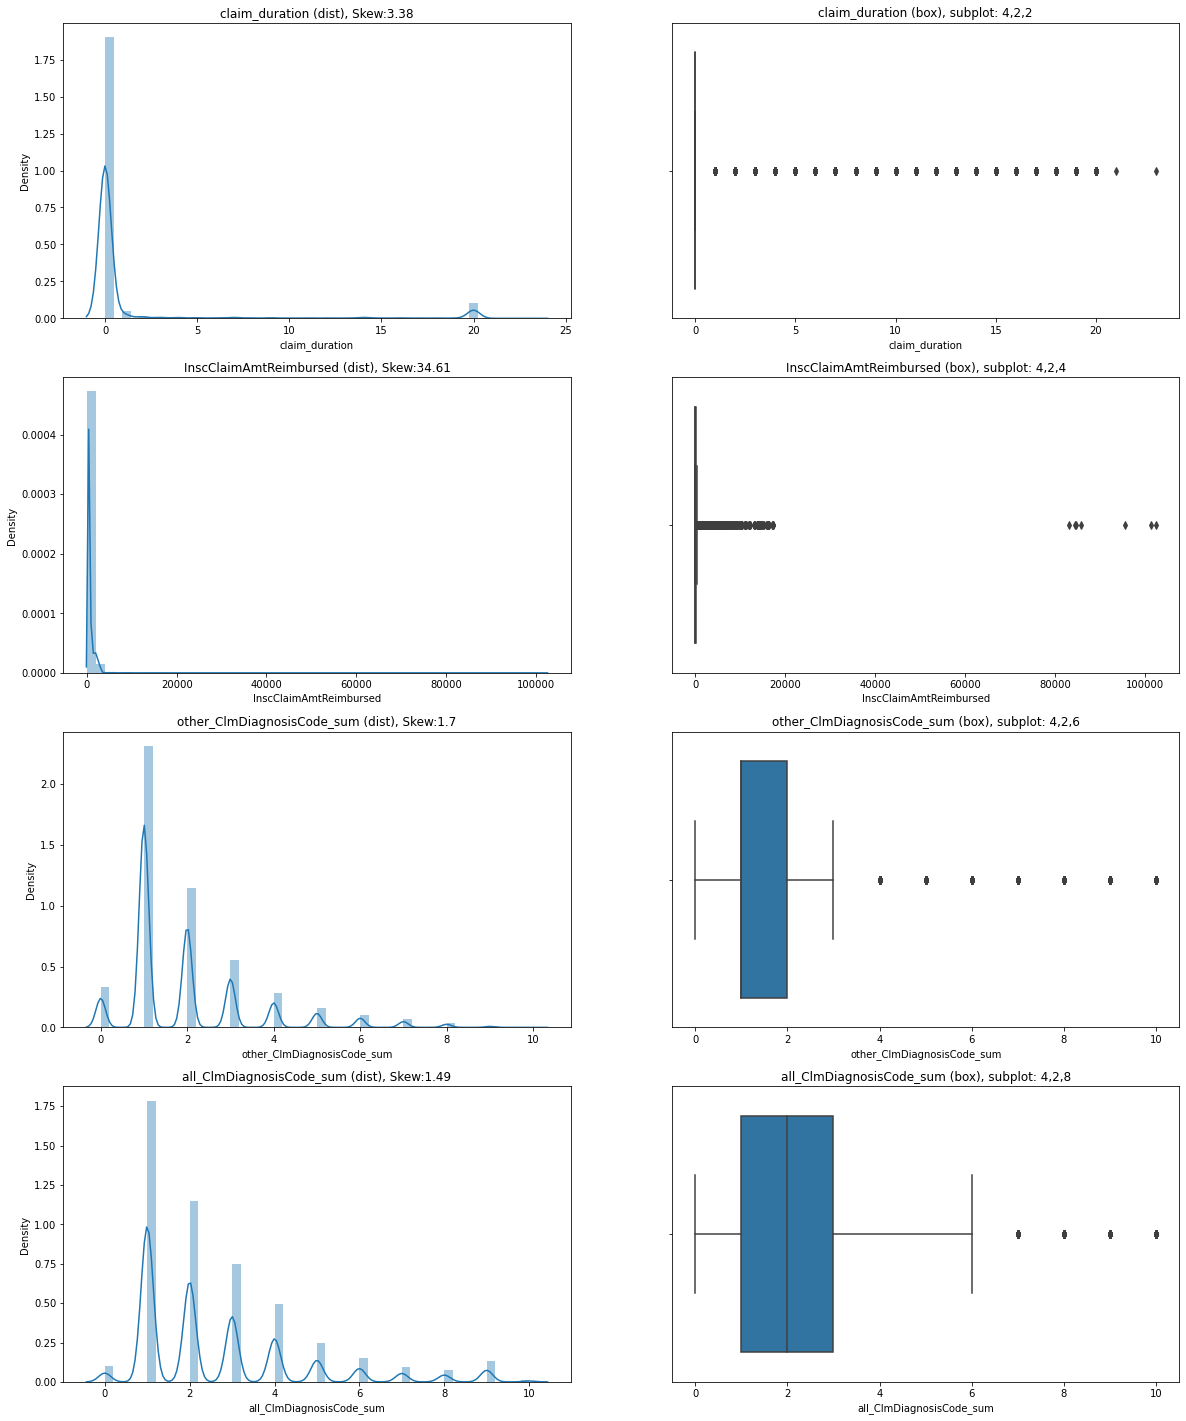

In [41]:
from sklearn.preprocessing import power_transform,PowerTransformer
import matplotlib.pyplot as plt
import seaborn as sns
dff = outpatient_onehot[["claim_duration","InscClaimAmtReimbursed","other_ClmDiagnosisCode_sum","all_ClmDiagnosisCode_sum"]] 
num_cols_ben = ["claim_duration","InscClaimAmtReimbursed","other_ClmDiagnosisCode_sum","all_ClmDiagnosisCode_sum"]
fig = plt.figure(figsize=(20,25))

#  plot Numerical Data
a = len(num_cols_ben)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter


for i in num_cols_ben:
    plt.subplot(a, b, c)
    skew = round(dff[i].skew(),2)
    plt.title('{} (dist), Skew:{}'.format(i, skew))
    plt.xlabel(i)
    sns.distplot(dff[i])
    c = c + 1

    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = dff[i])
    c = c + 1

C:\Users\MR321NC\Anaconda3\lib\site-packages\pandas\core\frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\MR321NC\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with simil

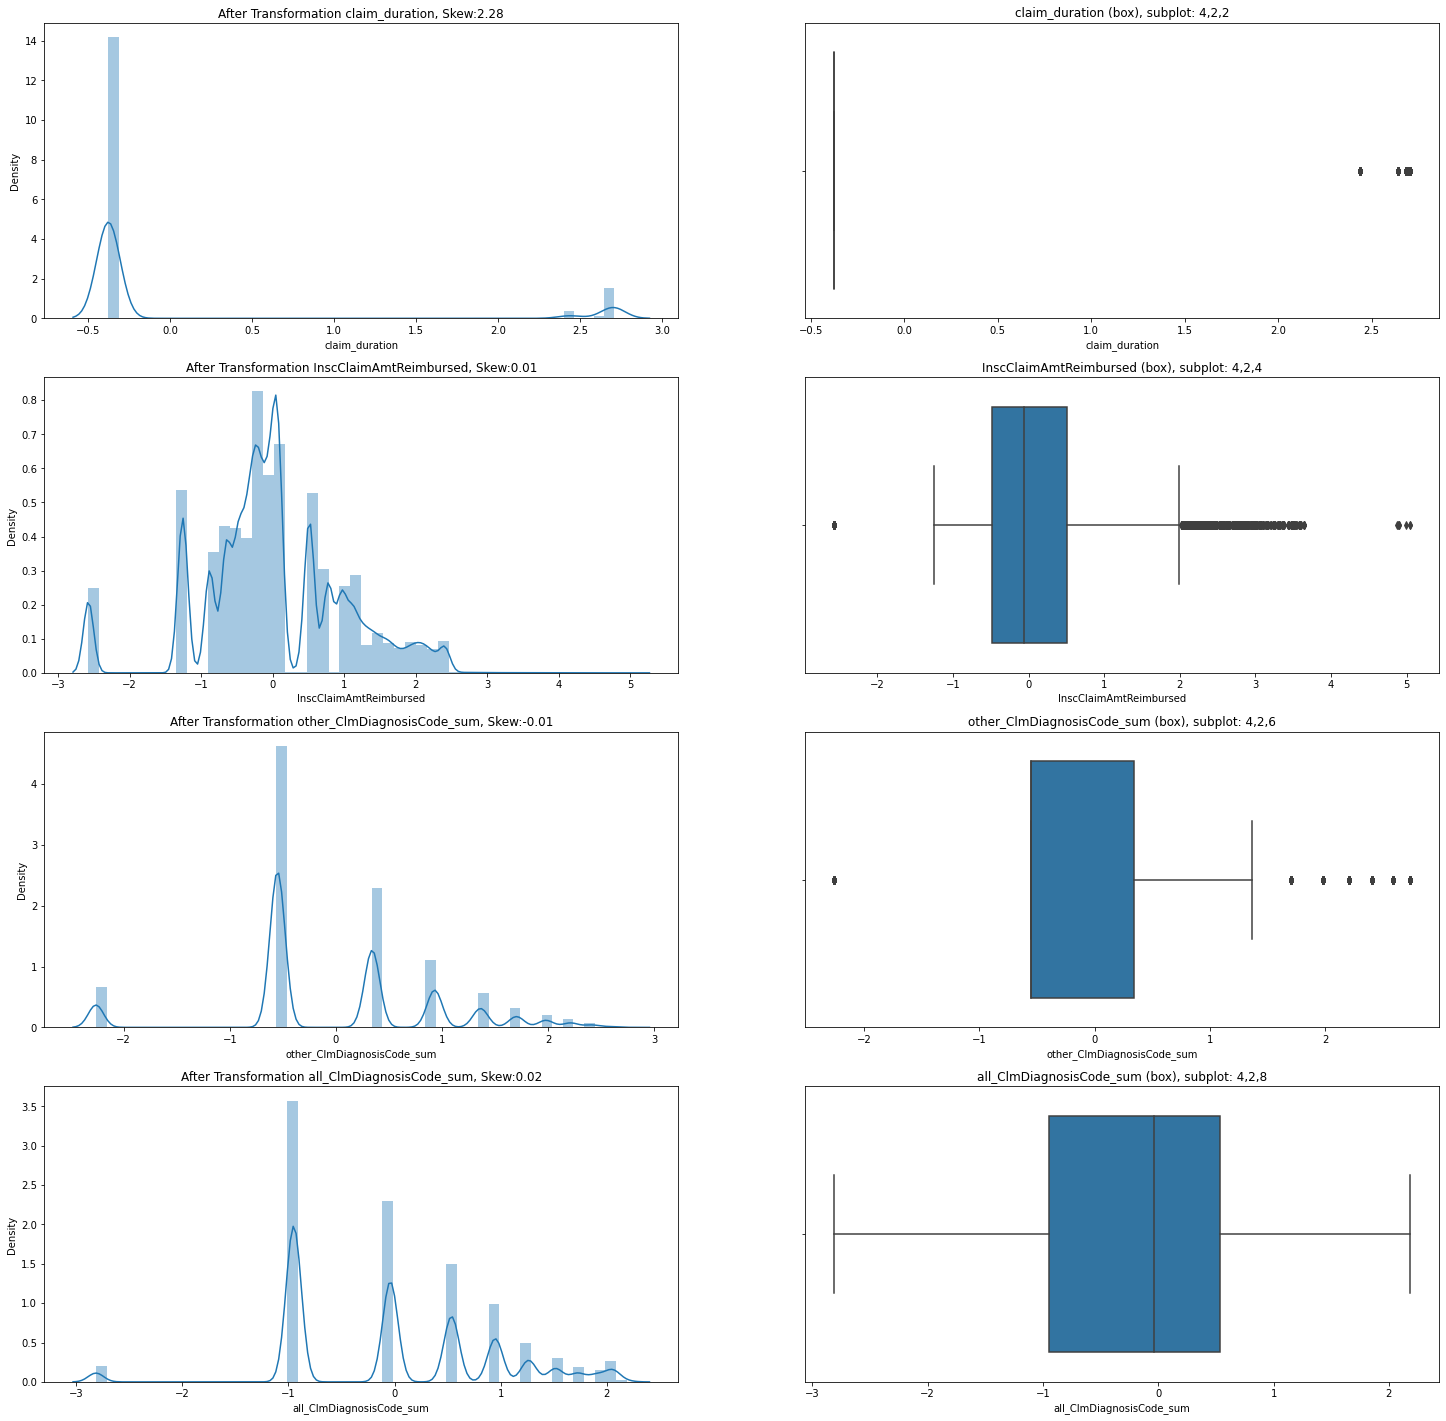

In [42]:
# df_num = np.log(df_ben[num_cols_ben])
PT_ben = PowerTransformer(method='yeo-johnson')

dff[num_cols_ben] = PT_ben.fit_transform(dff[num_cols_ben])

fig = plt.figure(figsize=(25,25))

#  plot Numerical Data
a = len(num_cols_ben)  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter


for i in num_cols_ben:
    plt.subplot(a, b, c)
    skew = round(dff[i].skew(),2)
    plt.title('After Transformation {}, Skew:{}'.format(i, skew))
    plt.xlabel(i)
    sns.distplot(dff[i])
    c = c + 1
    
    plt.subplot(a, b, c)
    plt.title('{} (box), subplot: {},{},{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(x = dff[i])
    c = c + 1

In [43]:
PT_ben = PowerTransformer(method='yeo-johnson')

outpatient_onehot[["claim_duration","InscClaimAmtReimbursed","other_ClmDiagnosisCode_sum","all_ClmDiagnosisCode_sum"]] = PT_ben.fit_transform(outpatient_onehot[["claim_duration","InscClaimAmtReimbursed","other_ClmDiagnosisCode_sum","all_ClmDiagnosisCode_sum"]])

In [44]:
outpatient_onehot.set_index("ClaimID",inplace=True)
outpatient_onehot

,Unnamed: 0,BeneID,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,0,BENE11002,PRV56011,-0.648831,PHY326117,NaN,NaN,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM189947,1,BENE11003,PRV57610,-0.062759,PHY362868,NaN,NaN,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM438021,2,BENE11003,PRV57595,-1.257161,PHY328821,NaN,NaN,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM121801,3,BENE11004,PRV56011,-0.480465,PHY334319,NaN,NaN,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM150998,4,BENE11004,PRV56011,0.512193,PHY403831,NaN,NaN,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.701433,1,1,1,1,1,1,0,0,0,0,1.515736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,517732,BENE159198,PRV53699,1.426422,PHY364188,PHY364188,PHY385752,-0.376620,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM551294,517733,BENE159198,PRV53702,0.962799,PHY423019,PHY332284,NaN,-0.376620,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.341742,1,1,1,0,0,0,0,0,0,0,0.536984
CLM596444,517734,BENE159198,PRV53676,-0.238062,PHY361063,NaN,NaN,-0.376620,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,1,0,0,0,0,0,0,0,0,-0.039876


In [45]:
outpatient_onehot.drop(["AttendingPhysician","OperatingPhysician","OtherPhysician"],axis=1,inplace=True)


In [46]:
outpatient_onehot

,Unnamed: 0,BeneID,Provider,InscClaimAmtReimbursed,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,0,BENE11002,PRV56011,-0.648831,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM189947,1,BENE11003,PRV57610,-0.062759,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM438021,2,BENE11003,PRV57595,-1.257161,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM121801,3,BENE11004,PRV56011,-0.480465,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM150998,4,BENE11004,PRV56011,0.512193,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.701433,1,1,1,1,1,1,0,0,0,0,1.515736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,517732,BENE159198,PRV53699,1.426422,-0.376620,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM551294,517733,BENE159198,PRV53702,0.962799,-0.376620,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.341742,1,1,1,0,0,0,0,0,0,0,0.536984
CLM596444,517734,BENE159198,PRV53676,-0.238062,-0.376620,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,1,0,0,0,0,0,0,0,0,-0.039876


In [48]:
outpatient_onehot.drop(["Unnamed: 0",],axis=1,inplace=True)

In [49]:
outpatient_onehot

,BeneID,Provider,InscClaimAmtReimbursed,claim_duration,AttendingPhysician_binary,OperatingPhysician_binary,OtherPhysician_binary,physician_count,2724,3051,78079,28521,2722,2859,41400,73300,2720,4019,58881,2809,496,2449,5990,4011,V5869,311,42731,V5861,V5883,25000,53081,4280,41401,other_ClmDiagnosisCode_sum,ClmDiagnosisCode_1_binary,ClmDiagnosisCode_2_binary,ClmDiagnosisCode_3_binary,ClmDiagnosisCode_4_binary,ClmDiagnosisCode_5_binary,ClmDiagnosisCode_6_binary,ClmDiagnosisCode_7_binary,ClmDiagnosisCode_8_binary,ClmDiagnosisCode_9_binary,ClmDiagnosisCode_10_binary,all_ClmDiagnosisCode_sum
ClaimID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CLM624349,BENE11002,PRV56011,-0.648831,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM189947,BENE11003,PRV57610,-0.062759,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM438021,BENE11003,PRV57595,-1.257161,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM121801,BENE11004,PRV56011,-0.480465,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,0,0,0,0,0,0,0,0,0,-0.950210
CLM150998,BENE11004,PRV56011,0.512193,-0.376620,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.701433,1,1,1,1,1,1,0,0,0,0,1.515736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CLM510792,BENE159198,PRV53699,1.426422,-0.376620,1,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.930105,1,1,1,0,0,0,0,0,0,0,0.536984
CLM551294,BENE159198,PRV53702,0.962799,-0.376620,1,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0.341742,1,1,1,0,0,0,0,0,0,0,0.536984
CLM596444,BENE159198,PRV53676,-0.238062,-0.376620,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-0.550047,1,1,0,0,0,0,0,0,0,0,-0.039876


In [50]:
outpatient_onehot.to_csv("outpatient_cleaned&transformed.csv")